In [1]:
import os
import sys
import site
from sparclur.parsers import MuPDF, Poppler, XPDF, Ghostscript
from sparclur.utils import image_highlight
from sparclur.prc import PRCViz

### Set the document

In [2]:
hello_world = os.path.join(sys.prefix, 'etc', 'sparclur', 'resources', 'hello_world_hand_edit.pdf')
#If the above does not load try the below. Otherwise any path to a PDF can be used here.
# hello_world = os.path.join(site.USER_BASE, 'etc', 'sparclur', 'resources', 'hello_world_hand_edit.pdf')

### ...and load it into MuPDF

In [3]:
mupdf = MuPDF(hello_world)
mupdf

num_pages:	(Property) Returns number of pages in the document
can_reforge:	(Property) Boolean for whether or not reforge capability is present
reforge:	(Property) Returns the raw binary of the reconstructed PDF
reforge_result:	(Property) Message conveying the success or failure of the reforging
save_reforge:	Save the reforge to the specified file location
can_extract_text:	(Property) Boolean for whether or not text extraction is present
get_text:	Return a dictionary of pages and their extracted texts
clear_text:	Clear the cache of text extraction
get_tokens:	Return a dictionary of the parsed text tokens
compare_text:	Return the Jaccard similarity of the shingled tokens between two text extractors
can_render:	Boolean for whether or not rendering capability is present
validate_renderer:	(Property) Determines the PDF validity for rendering process
logs:	(Property) Any logs collected during the rendering process
caching:	(Property) Whether renders are cached or not
clear_renders:	Clears an

### Here's the first page rendered

Deprecation: 'getPixmap' removed from class 'Page' after v1.19 - use 'get_pixmap'.


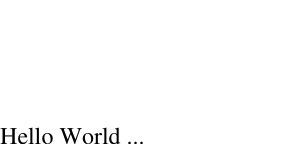

In [4]:
mupdf.get_renders(0)

In [5]:
mupdf.validate_renderer

{'valid': True, 'status': 'Valid with Warnings'}

<hr>

### And now Poppler

In [6]:
poppler = Poppler(hello_world)

In [7]:
poppler

num_pages:	(Property) Returns number of pages in the document
can_reforge:	(Property) Boolean for whether or not reforge capability is present
reforge:	(Property) Returns the raw binary of the reconstructed PDF
reforge_result:	(Property) Message conveying the success or failure of the reforging
save_reforge:	Save the reforge to the specified file location
can_extract_image_data:	(Property) Boolean for whether or not image data extraction 
                                                capability is present
contains_jpeg:	(Property) Returns True if jpeg data was extracted from the PDF
contains_images:	(Property) Returns True if image data was extracted from the PDF
images:	(Property) Returns the image data that was extracted from the PDF
validate_image_data:	(Property) Determines the PDF validity for image data extraction
can_extract_font:	(Property) Boolean for whether or not font extraction is present
non_embedded_fonts:	(Property) Returns true if the document is missing non-system f

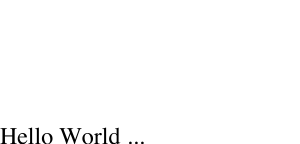

In [8]:
poppler.get_renders(0)

In [9]:
poppler.validate_renderer

{'valid': True, 'status': 'Valid'}

<hr>

### Let's compare the renders of MuPDF with Poppler

In [10]:
prc_result = mupdf.compare(poppler, page=0, full=True)
prc_result

Deprecation: 'getPixmap' removed from class 'Page' after v1.19 - use 'get_pixmap'.


sim: 0.9809986804415988
entropy_sim: 0.9977871081780013
whash_sim: 0.99676513671875
phash_sim: 0.9200439453125
sum_square_sim: 0.9994275396456942
ccorr_sim: 0.9997137784957886
ccoeff_sim: 0.9722545742988586
size_sim: 1.0

<hr>

### A number of different measures are calculated and the average 'sim' is a score between 0 and 1, 0 being entirely dissimilar and 1 being identical. Here we can see that the MuPDF and Poppler renders are nearly identical. We can visualize this difference using structural similarity seen below.

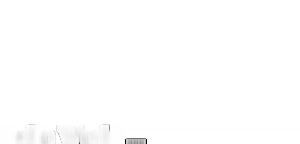

In [11]:
prc_result.diff

<hr>

### Now let's run Ghostscript

In [12]:
ghost = Ghostscript(hello_world)
ghost

num_pages:	(Property) Returns number of pages in the document
can_reforge:	(Property) Boolean for whether or not reforge capability is present
reforge:	(Property) Returns the raw binary of the reconstructed PDF
reforge_result:	(Property) Message conveying the success or failure of the reforging
save_reforge:	Save the reforge to the specified file location
can_extract_text:	(Property) Boolean for whether or not text extraction is present
get_text:	Return a dictionary of pages and their extracted texts
clear_text:	Clear the cache of text extraction
get_tokens:	Return a dictionary of the parsed text tokens
compare_text:	Return the Jaccard similarity of the shingled tokens between two text extractors
can_render:	Boolean for whether or not rendering capability is present
validate_renderer:	(Property) Determines the PDF validity for rendering process
logs:	(Property) Any logs collected during the rendering process
caching:	(Property) Whether renders are cached or not
clear_renders:	Clears an

<hr>

### The similarity is worse between MuPDF and Ghostscript

In [13]:
prc_2 = mupdf.compare(ghost, page=0, full=True)
prc_2

Deprecation: 'getPixmap' removed from class 'Page' after v1.19 - use 'get_pixmap'.


GPL Ghostscript 9.55.0 (2021-09-27)
Copyright (C) 2021 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
   **** Error:  An error occurred while reading an XREF table.
   **** The file has been damaged.  This may have been caused
   **** by a problem while converting or transferring the file.
   **** Ghostscript will attempt to recover the data.
   **** However, the output may be incorrect.
Processing pages 1 through 1.
Page 1
   **** Error: stream Length incorrect.
               Output may be incorrect.
Loading NimbusRoman-Regular font from /usr/local/Cellar/ghostscript/9.55.0/share/ghostscript/9.55.0/Resource/Font/NimbusRoman-Regular... 4405676 2936315 6490300 5176867 4 done.

   **** This file had errors that were repaired or ignored.
   **** Please notify the author of the software that produced this
   **** file that it does not conform to Adobe's published PDF
   **** specific

sim: 0.8867656788894127
entropy_sim: 0.737493194004426
whash_sim: 0.74359130859375
phash_sim: 0.8936767578125
sum_square_sim: 0.9989115835633129
ccorr_sim: 0.9994558095932007
ccoeff_sim: 0.9474654197692871
size_sim: 1.0

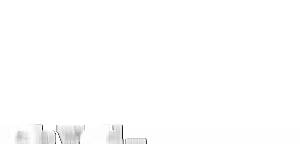

In [14]:
prc_2.diff

<hr>

### Let's highlight the region with the most dissimilar Shannon entropy measures. We can see that the 'W' is the most off (though still fairly identical to the naked eye).

Deprecation: 'getPixmap' removed from class 'Page' after v1.19 - use 'get_pixmap'.


GPL Ghostscript 9.55.0 (2021-09-27)
Copyright (C) 2021 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
   **** Error:  An error occurred while reading an XREF table.
   **** The file has been damaged.  This may have been caused
   **** by a problem while converting or transferring the file.
   **** Ghostscript will attempt to recover the data.
   **** However, the output may be incorrect.
Processing pages 1 through 1.
Page 1
   **** Error: stream Length incorrect.
               Output may be incorrect.
Loading NimbusRoman-Regular font from /usr/local/Cellar/ghostscript/9.55.0/share/ghostscript/9.55.0/Resource/Font/NimbusRoman-Regular... 4405676 2936538 6490300 5176867 4 done.

   **** This file had errors that were repaired or ignored.
   **** Please notify the author of the software that produced this
   **** file that it does not conform to Adobe's published PDF
   **** specific

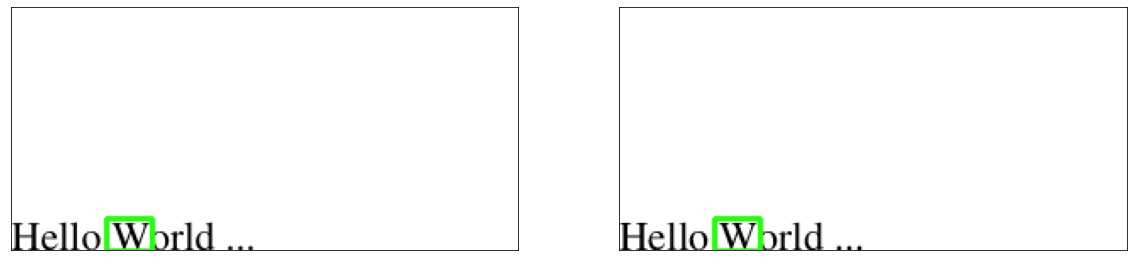

In [15]:
image_highlight(mupdf.get_renders(0), ghost.get_renders(0), min_region=120, info_loss=0.7, display_height=10, display_width=20)

<hr>

### Let's go ahead and run all of the pairwise comparisons for this page between all the SPARCLUR renderers.

GPL Ghostscript 9.55.0 (2021-09-27)
Copyright (C) 2021 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
   **** Error:  An error occurred while reading an XREF table.
   **** The file has been damaged.  This may have been caused
   **** by a problem while converting or transferring the file.
   **** Ghostscript will attempt to recover the data.
   **** However, the output may be incorrect.
Processing pages 1 through 1.
Page 1
   **** Error: stream Length incorrect.
               Output may be incorrect.
Loading NimbusRoman-Regular font from /usr/local/Cellar/ghostscript/9.55.0/share/ghostscript/9.55.0/Resource/Font/NimbusRoman-Regular... 4425876 2942481 6510500 5183647 4 done.

   **** This file had errors that were repaired or ignored.
   **** Please notify the author of the software that produced this
   **** file that it does not conform to Adobe's published PDF
   **** specific

Deprecation: 'getPixmap' removed from class 'Page' after v1.19 - use 'get_pixmap'.


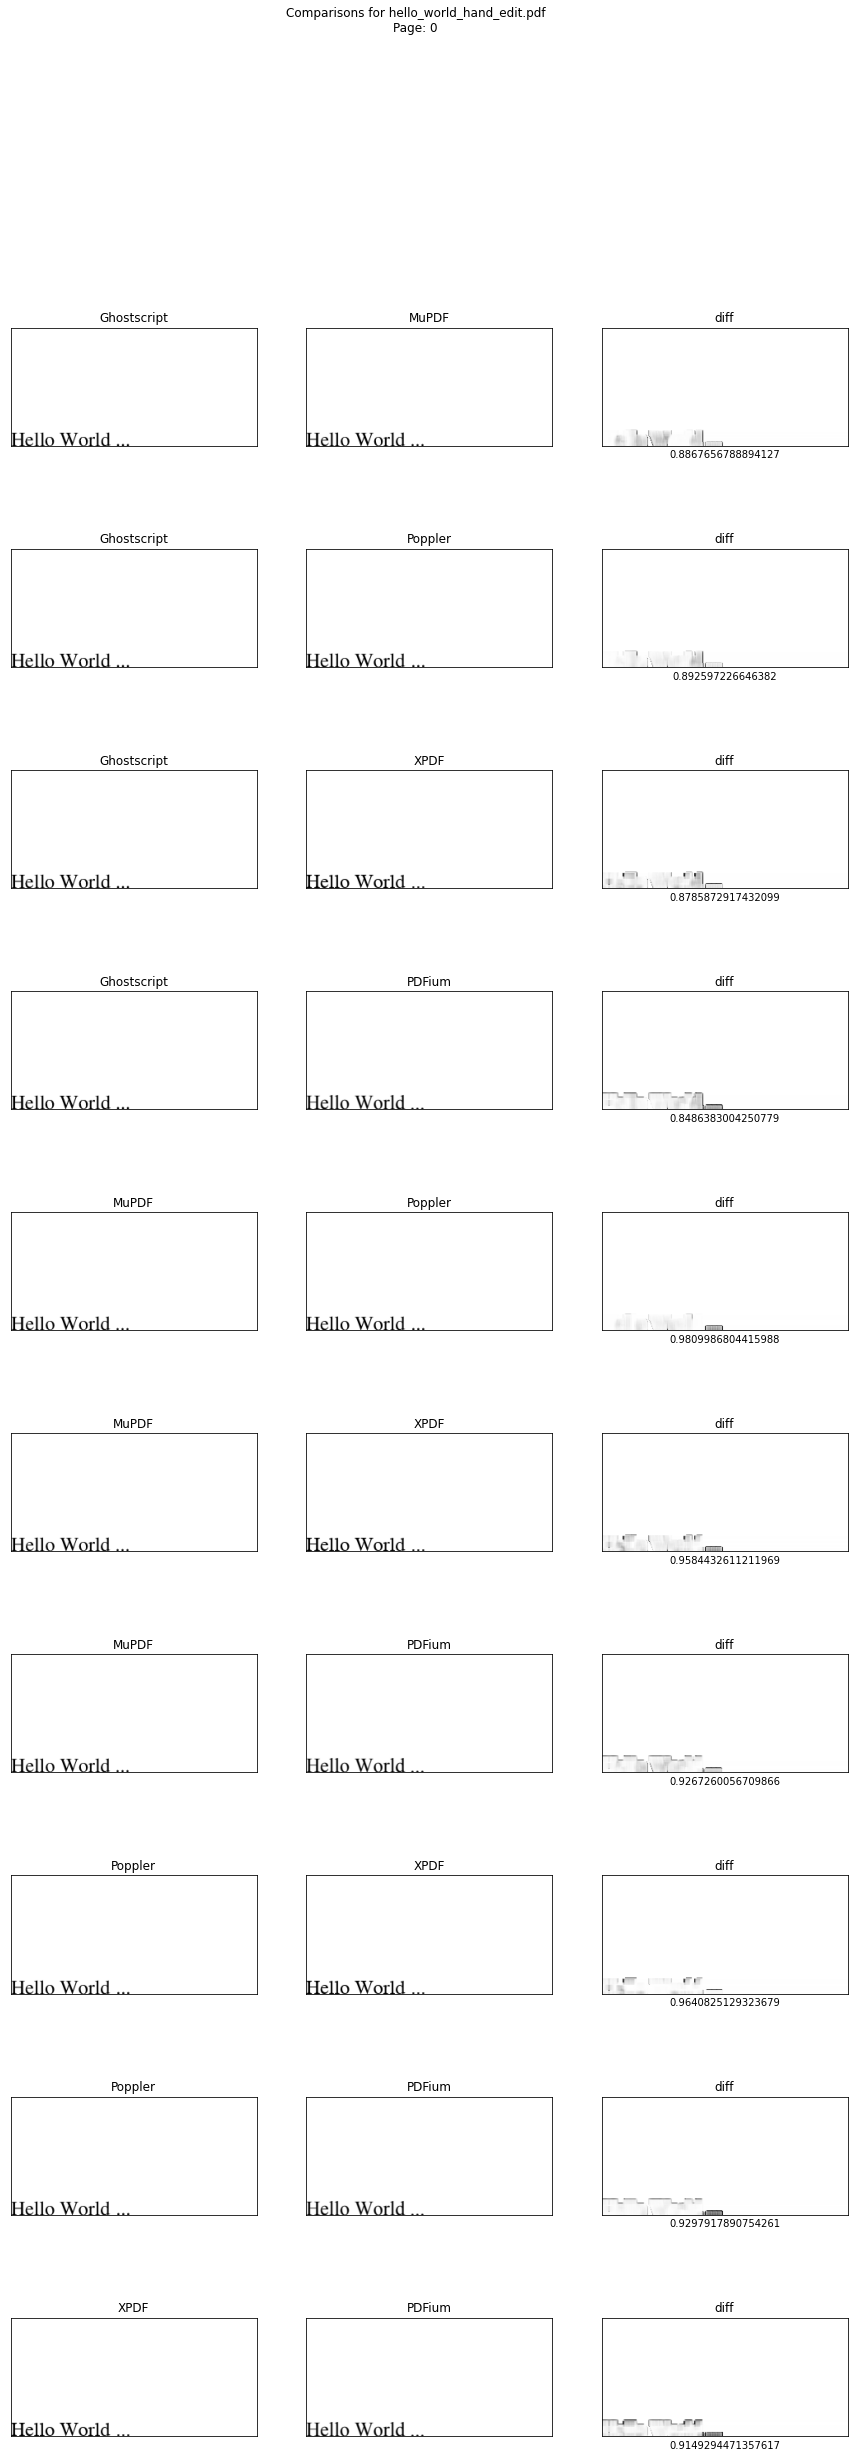

In [17]:
viz = PRCViz(hello_world, dpi=72)
viz.display(0, height=40, width=15)